
<h1><center> Assignment4 </center></h1>

<h3><center> Student Number : 1002572236</center></h3>

<h3><center> Name: Redko Danil </center></h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean as euc
import matplotlib.patches as patches
from skimage import transform as tf
from skimage.transform import ProjectiveTransform
from scipy.io import loadmat
%matplotlib inline



__Question 1__ Attached is an image um_000038.png recorded with a camera mounted on a car. The focal
length of the camera is 721.5, and the principal point is (609.6; 172.9). We know that the camera
was attached to the car at a distance of 1.7 meters above ground.

In [2]:
img = cv2.imread('um_000038.png', 1)[:,:,::-1] # Converting BGR to RGB

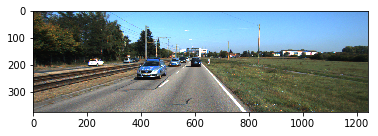

In [3]:
plt.imshow(img)

In [4]:
focal_length = 721.5
p_x = 609.6
p_y = 172.9
height = 1.7

__a)__ Write the internal camera parameter matrix K. 

In [5]:
K = np.array([[focal_length, 0, p_x], [0, focal_length, p_y],[0,0,1]])

In [6]:
K

array([[721.5,   0. , 609.6],
       [  0. , 721.5, 172.9],
       [  0. ,   0. ,   1. ]])

__b)__ Write the equation of the ground plane in camera's coordinate system. You can
assume that the camera's image plane is orthogonal to the ground.

__Question 2__ Your goal is to create a simple system that analyzes the road ahead
of the driving car. Include your code to your solution document.

Get the first 3 names of the images as stated in the assignment

In [7]:
img1, img2, img3 = np.loadtxt('data/test/test.txt',dtype=str)[:3]

Get the camera parameters from the data and transform them into the floats :

In [8]:
def get_camera_parameters(img_name):
    
    param = np.loadtxt('data/test/calib/'+img_name+'_allcalib.txt', dtype=str)
    f, px, py, baseline = float(param[0][1]), float(param[1][1]), float(param[2][1]), float(param[3][1])
    return f, px, py, baseline

Get the image with the estimated disparity given by the dataset :

In [9]:
def get_disparity(img_name):
     
    disparity = cv2.imread('data/test/results/'+img_name+'_left_disparity.png', 0)
    return disparity

Compute the depth of the image :

In [10]:
def get_depth(img_name):
    
    f, px, py, baseline = get_camera_parameters(img_name)
    
    disparity = get_disparity(img_name)
    
    # Change all zeros to ones to avoid the division by zero
    disparity = np.where(disparity==0.0, 1.0, disparity) 
    
    # Compute the depth by the formula 
    depth = (f*baseline)/ disparity 
    
    # Since we changed zeros to one, we should replace these values by the maximum depth
    depth = np.where(depth==f*baseline, np.max(depth), depth)
    
    return depth
    

Visualize the results for 3 images:

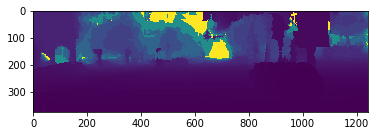

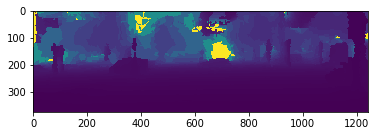

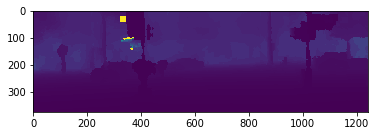

In [31]:
plt.imshow(get_depth(img1))
plt.show()
plt.imshow(get_depth(img2))
plt.show()
plt.imshow(get_depth(img3))
plt.show()

__Question 2e__. In your solution document, include a visualization of the first three images with
all the car, person and cyclist detections. Mark the car detections with red, person with
blue and cyclist with cyan rectangles. Inside each rectangle (preferably the top left corner)
also write the label, be it a car, person or cyclist.

First, we load .mat file from the dataset.

In [14]:
def get_dets(img_name):

    return loadmat('data/test/results/dets-test/'+img_name+'_dets.mat')

We get $x_{left}$, $y_{top}$, $x_{right}$, $y_{bottom}$ for each objects from .mat file and put them into the array:

In [15]:
def get_object_points(object_points):
    
    item_list = []
    
    for item in object_points:
        
        item_list.append([item[0], item[1], item[2], item[3]])
    
    return np.array(item_list)


We get the dictionary of detected points from the .mat file, and then transform them into the desired format.

In [16]:
def get_points(dets):
    
    cars = dets['dets'][0][0]
    persons = dets['dets'][1][0]
    bicycles = dets['dets'][2][0]
    
    car_points = get_object_points(cars)
    bicycle_points = get_object_points(bicycles)
    person_points = get_object_points(persons)
    
    return car_points, bicycle_points, person_points
    

For each detected object we draw a reactangle with a specified color: 

In [17]:
def graph_box_for_object(objects, ax, name):
    
    if name =='car':
        color = 'red'
    
    elif name=='bicycle':
        color = 'cyan'
    
    else:
        color = 'b'
    
    for item in objects:
        
        x_left, y_top, x_right, y_bottom = item[0], item[1], item[2], item[3]
    
        rect = patches.Rectangle((x_left, y_top), x_right - x_left ,y_bottom - y_top,
                                 linewidth=5, edgecolor=color, facecolor='none')
        
        ax.text(x_left , y_top+20, name ,fontsize=40, color='y')
        ax.add_patch(rect)
        
    

In [18]:
def graph_points(img_name):
    
    img = cv2.imread('data/test/left/'+img_name+'.jpg', 1)[:,:,::-1]
    
    dets = get_dets(img_name)
        
    cars, bicycles, persons = get_points(dets)

    fig = plt.figure(figsize=(20,20))
 
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    ax.imshow(img)
        
    graph_box_for_object(cars, ax, 'car')
    graph_box_for_object(bicycles, ax, 'bicycle')
    graph_box_for_object(persons, ax, 'person')
    
    fig.add_axes(ax)


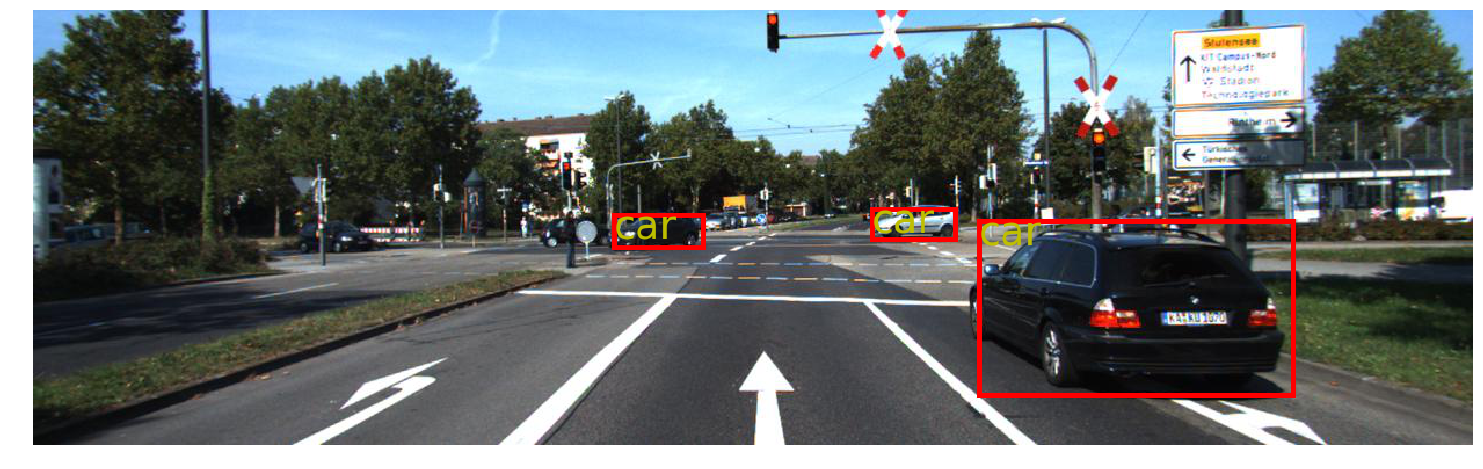

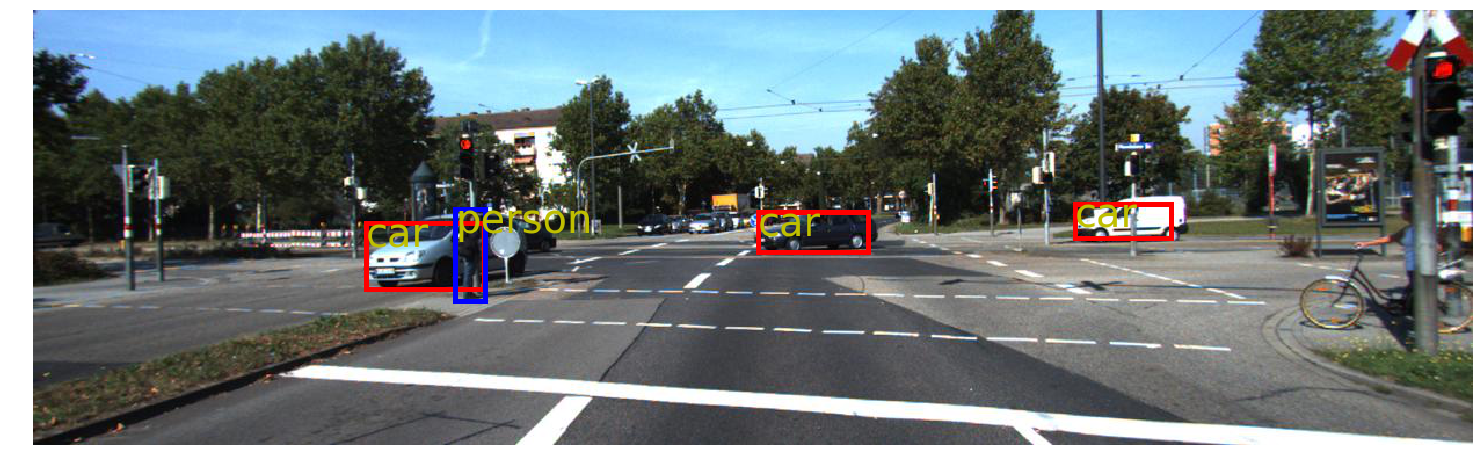

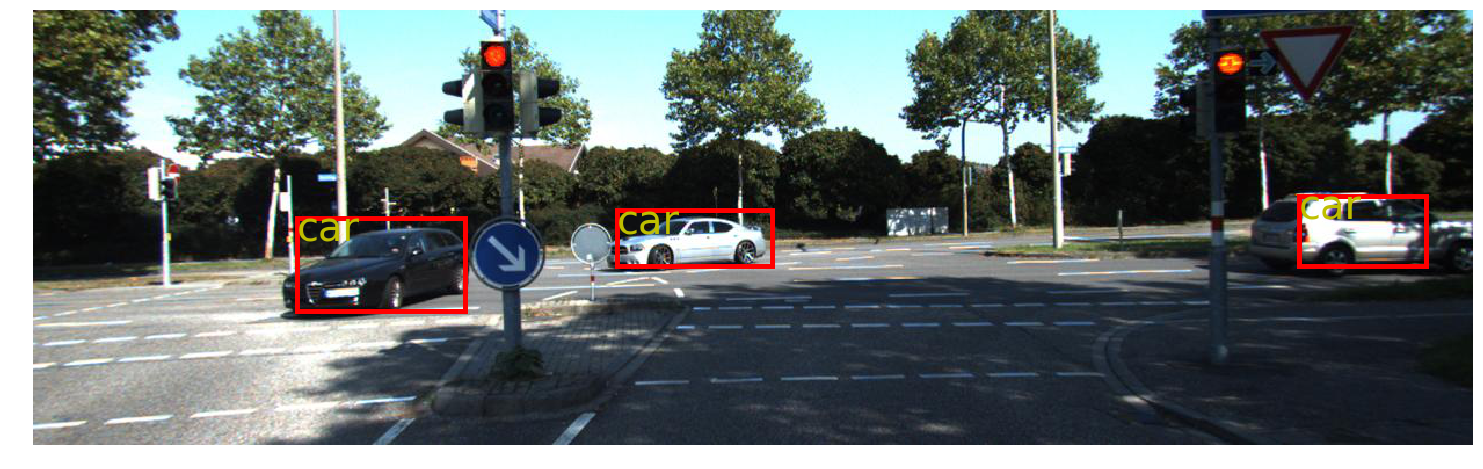

In [21]:
graph_points(img1)
graph_points(img2)
graph_points(img3)